In [46]:
#compute probabilities of for given branch in the binary tree
def split_weights(n,k):
    v0=binomial(n-1,k)
    v1=binomial(n-1,k-1)
    return v0/(v0+v1),v1/(v0+v1)

#compute all probabilities for the binary tree
def circuit_layout(n,k):
    L=[]
    for i in range(n):
        for j in range(min(i,k-1),-1,-1):
            if n-i >= k-j:
                L.append([n-i,k-j,split_weights(n-i,k-j)])
    return L

In [47]:
#draw circuit using qiskit
import numpy as np
from qiskit import *
def draw_circuit(n,k):
    q=QuantumRegister(n,"q")
    a=QuantumRegister(k,"a")
    circuit = QuantumCircuit(q,a)
    L=circuit_layout(n,k)
    #print(L)
    cur=n
    circuit.x(n+k-1)
    for i in L:
        if i[0]!=cur:
            circuit.barrier()
            cur=i[0]
        if(i[2]==(0,1)):
            circuit.cx(n+i[1]-1,n-i[0])
        else:
            if i[0]!=n:
                circuit.cry(float(2*arccos(sqrt(i[2][0]))),n+i[1]-1,n-i[0])
            else:
                circuit.ry(float(2*arccos(sqrt(i[2][0]))),0)
        if i[1]!=1:
            circuit.cswap(n-i[0],n-1+i[1],n-1+i[1]-1)
        else:
            circuit.cx(n-i[0],n)

    return circuit.draw("mpl")



In [48]:

from qibo.models import Circuit
from qibo import gates

def create_qibo_circuit(n,k):
    c=Circuit(int(n+k))
    L=circuit_layout(n,k)
    #print(L)
    cur=n
    c.add(gates.X(n+k-1))
    for i in L:
        if(i[2]==(0,1)):
            c.add(gates.CNOT(n+i[1]-1,n-i[0]))
        else:
            if i[0]!=n:
                c.add(gates.CRY(n+i[1]-1,n-i[0],float(2*arccos(sqrt(i[2][0])))))
            else:
                c.add(gates.RY(0,float(2*arccos(sqrt(i[2][0])))))
        if i[1]!=1:
            g=gates.SWAP(n-1+i[1],n-1+i[1]-1)
            g.controlled_by(n-i[0])
            c.add(g)
        else:
            c.add(gates.CNOT(n-i[0],n))
    return c

In [45]:
#example for 5-bit values with 3 bits set (n=5, k=3)
c=create_qibo_circuit(5,3)
c.add(gates.M(0,1,2,3,4))
measure=c(nshots=int(100000))
for i in measure.frequencies():
    print(i,measure.frequencies()[i]/100000)

00111 0.1000133
01011 0.0999117
01101 0.1000207
01110 0.1000496
10011 0.1000526
10101 0.0999812
10110 0.0999885
11001 0.1001478
11010 0.0999761
11100 0.0998585


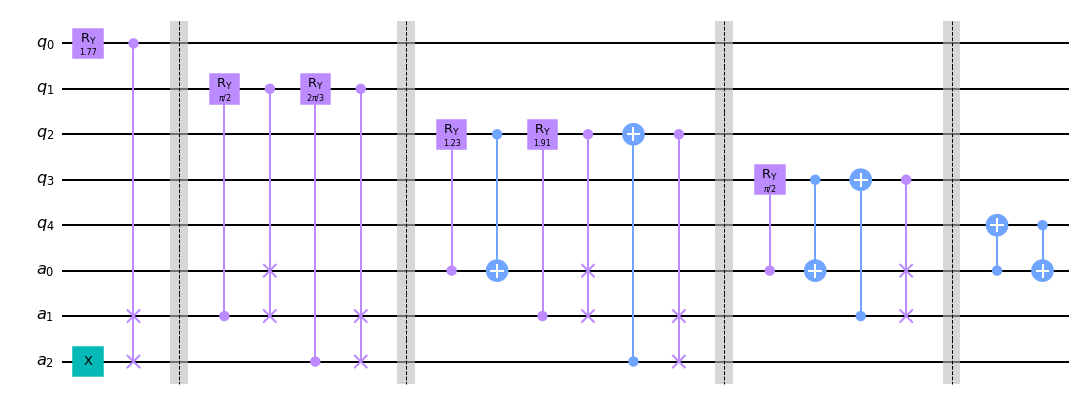

In [49]:
draw_circuit(5,3)